In [2]:
# downloads
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Alek\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alek\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Alek\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to

True

In [3]:
import pandas as pd

train_data = pd.read_csv('../fake_news_data/train.csv')
train_data = train_data.set_index('id')
# train_data.head()

test_data = pd.read_csv('../fake_news_data/test.csv')
test_data = test_data.set_index('id')
# test_data.head()

submit = pd.read_csv('../fake_news_data/submit.csv')
submit = submit.set_index('id')
# submit.head()

# train_data['text'][0]

submit.info()
test_data.info()

from nltk.corpus import stopwords
import re

wnl = nltk.stem.WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#remove null values from train_data
train_data = train_data.dropna()

#remove null values from test_data
test_data = test_data.join(submit)
test_data = test_data.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 20800 to 25999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   5200 non-null   int64
dtypes: int64(1)
memory usage: 81.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 20800 to 25999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5078 non-null   object
 1   author  4697 non-null   object
 2   text    5193 non-null   object
dtypes: object(3)
memory usage: 162.5+ KB


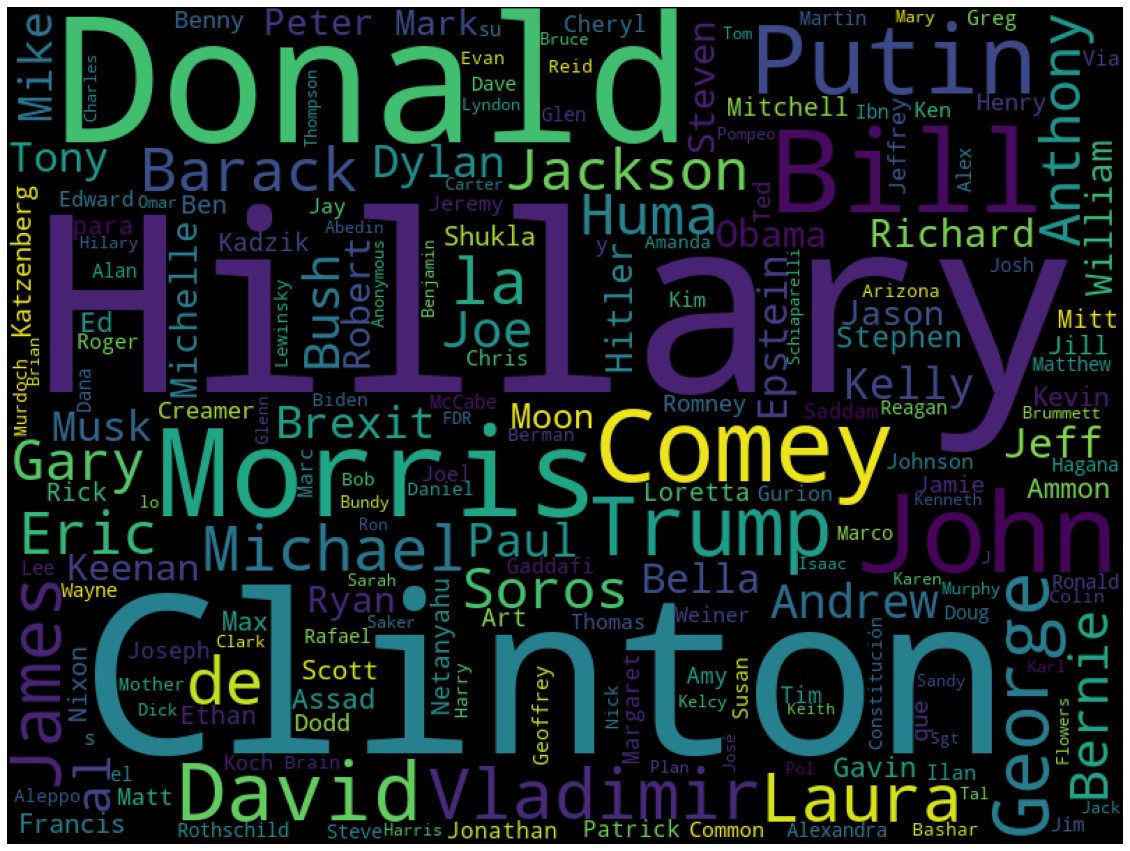

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
word_cloud = WordCloud(background_color='black', width=800, height=600, collocations = False, random_state=1)
nlp = en_core_web_sm.load()
nlp.max_length = 25000000

# we only chose a subset of the training data to not crash our computers
false_string = nlp(' '.join(train_data['text'].where(train_data['label'] == 1)[0:1000].dropna()))

word_cloud_string = ""

for token in false_string.ents:
  if token.label_ == 'PERSON':
    word_cloud_string += token.text.split(' ')[0] + " "

false_text_cloud = word_cloud.generate(word_cloud_string)
plt.figure(figsize=(20,30))
plt.imshow(false_text_cloud)
plt.axis('off')
plt.show()

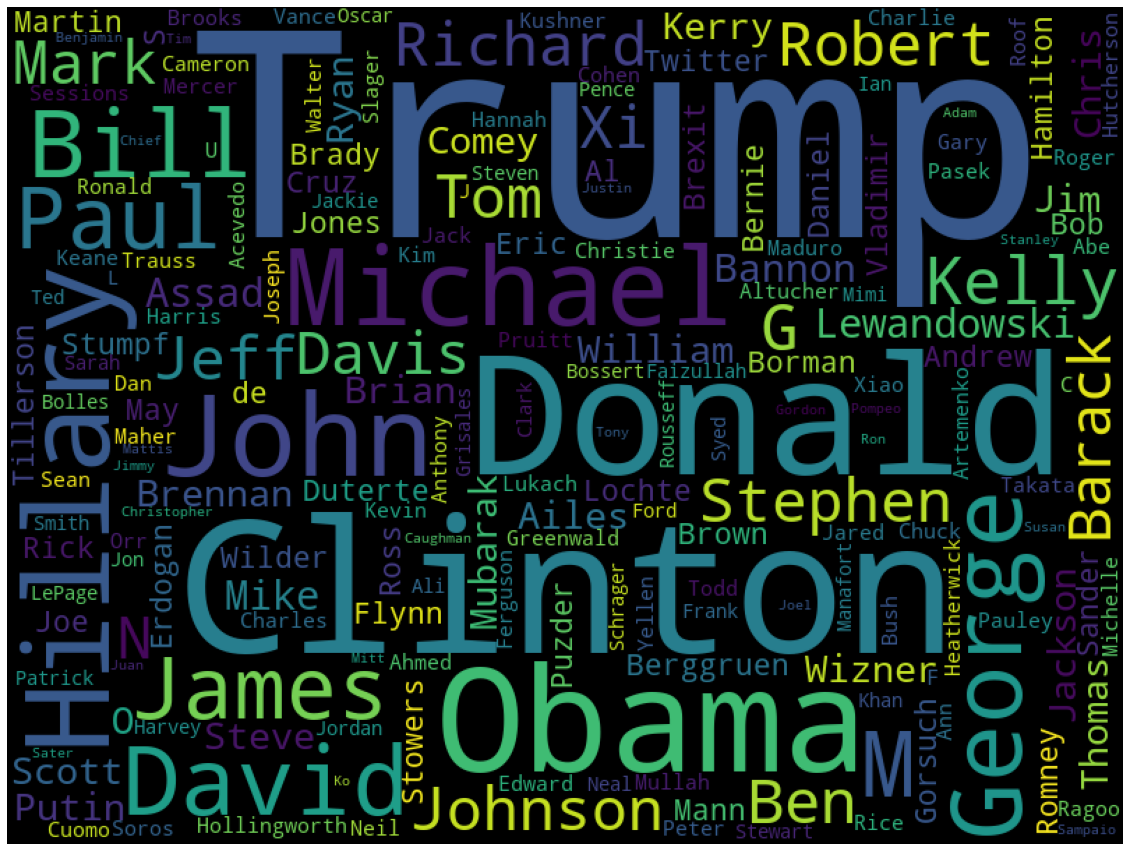

In [8]:
truth_string = nlp(' '.join(train_data['text'].where(train_data['label'] == 0)[0:1000].dropna()))

word_cloud_string = ""

for token in truth_string.ents:
  if token.label_ == 'PERSON':
    word_cloud_string += token.text.split(' ')[0] + " "

truth_text_cloud = word_cloud.generate(word_cloud_string)
plt.figure(figsize=(20,30))
plt.imshow(truth_text_cloud)
plt.axis('off')
plt.show()